## 线性回归应用案例
前面我们通过一个小例子介绍了线性回归模型。下面我们用一个现实的数据集来应用线性回归算法。假如你去参加聚会，想喝最好的红酒，可以让朋友推荐，不过你觉得他们也不靠谱。作为科学控，你带了pH试纸和一堆测量工具来测酒的理化性质，然后选一个最好的，周围的小伙伴都无语了，你亮瞎了世界。

网上有相关的酒数据集可以参考，UCI机器学习项目的酒数据集收集了1599种酒的测试数据,数据下载链接[在此](http://www3.dsi.uminho.pt/pcortez/wine/winequality.zip)。收集完数据自然要用线性回归来研究一下，响应变量是0-10的整数值，我们也可以把这个问题看成是一个分类问题。不过本章还是把相应变量作为连续值来处理。

### 探索数据
scikit-learn作为机器学习系统，其探索数据的能力是不能与SPSS和R语言相媲美的。不过我们有Pandas库，可以方便的读取数据，完成描述性统计工作。我们通过描述性统计来设计模型。Pandas引入了R语言的dataframe，一种二维表格式异质（heterogeneous）数据结构。Pandas更多功能请见[文档](http://pandas.pydata.org)，这里只用一部分功能，都很容易使用。

首先，我们读取.csv文件生成dataframe：

In [2]:
import pandas as pd
df = pd.read_csv('mlslpic/winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


对于数据的描述性分析就这么简单，我们通过Dataframe.describe()方法获得了一堆描述性统计结果。pd.read_csv()读取.csv文件。

下面我们在用matplotlib看看，获得更直观的认识：

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\msyh.ttc", size=10)

设定绘图相关参数

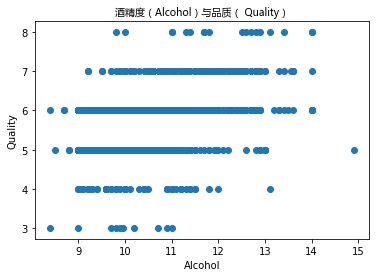

In [8]:
plt.scatter(df['alcohol'], df['quality'])
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('酒精度（Alcohol）与品质（ Quality）',fontproperties=font)
plt.show()

散点图显示酒精度（Alcohol）与品质有比较弱的正相关特性，整体呈左下-右上趋势，也就是说酒精度较高的酒具有较高的品质。挥发性酸度（volatile acidity）与品质呈现负相关特性：

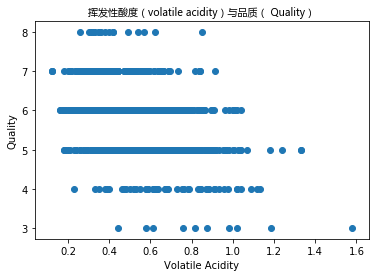

In [9]:
plt.scatter(df['volatile acidity'], df['quality'])
plt.xlabel('Volatile Acidity')
plt.ylabel('Quality')
plt.title('挥发性酸度（volatile acidity）与品质（ Quality）',fontproperties=font)
plt.show()

这些图都可以显示出响应变量与解释变量的相关性；让我们构建一个多元线性相关模型表述这些相关性。如何决定哪个变量应该在模型中？哪个可以不在？通过Dataframe.corr()计算两两的关联矩阵（correlation matrix）。关联矩阵进一步确认了酒精度与品质的正相关性，挥发性酸度与品质的负相关性。挥发性酸度越高，酒喝着就越向醋。总之，我们就假设好酒应该具有酒精度高、挥发性酸度低的特点，虽然这和品酒师的味觉可能不太一致。

## 拟合与评估模型

现在，我们把数据分成训练集和测试集，训练回归模型然后评估预测结果：

In [10]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
df = pd.read_csv('mlslpic/winequality-red.csv', sep=';')
X = df[list(df.columns)[:-1]]
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_predictions = regressor.predict(X_test)
print('R-squared:', regressor.score(X_test, y_test))

R-squared: 0.379323764551


C:\Users\lymanZHANG\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


开始和前面类似，加载数据，然后通过train_test_split把数据集分成训练集和测试集。两个分区的数据比例都可以通过参数设置。默认情况下，25%的数据被分配给测试集。最后，我们训练模型并用测试集测试。

R方值0.38表明38%的测试集数据都通过了测试。如果剩下的72%的数据被分到训练集，那效果就不一样了。我们可以用交叉检验的方法来实现一个更完善的效果评估。上一章我们介绍过这类方法，可以用来减少不同训练和测试数据集带来的变化。

In [11]:
from sklearn.cross_validation import cross_val_score
regressor = LinearRegression()
scores = cross_val_score(regressor, X, y, cv=5)
print(scores.mean(), scores)

0.290041628842 [ 0.13200871  0.31858135  0.34955348  0.369145    0.2809196 ]


这里cross_val_score函数可以帮助我们轻松实现交叉检验功能。cv参数将数据集分成了5份。每个分区都会轮流作为测试集使用。cross_val_score函数返回模拟器score方法的结果。R方结果是在0.13到0.37之间，均值0.29，是模拟器模拟出的结果，相比单个训练/测试集的效果要好。

让我们看看一些模型的预测品质与实际品质的图象显示结果：

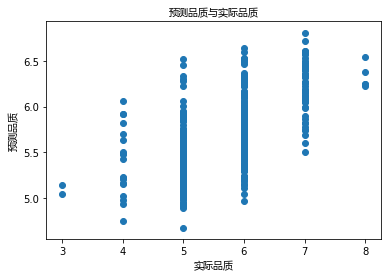

In [12]:
plt.scatter(y_test, y_predictions)
plt.xlabel('实际品质',fontproperties=font)
plt.ylabel('预测品质',fontproperties=font)
plt.title('预测品质与实际品质',fontproperties=font)
plt.show()

和假设一致，预测品质很少和实际品质完全一致。由于绝大多数训练数据都是一般品质的酒，所以这个模型更适合预测一般质量的酒。

## 梯度下降法拟合模型

前面的内容都是通过最小化成本函数来计算参数的：

β = (X<sup>T</sup>X)<sup>-1</sup>X<sup>T</sup>Y

这里X是解释变量矩阵，当变量很多（上万个）的时候， X<sup>T</sup>X计算量会非常大。另外，如果X<sup>T</sup>X的行列式为0，即奇异矩阵，那么就无法求逆矩阵了。这里我们介绍另一种参数估计的方法，梯度下降法（gradient descent）。拟合的目标并没有变，我们还是用成本函数最小化来进行参数估计。

梯度下降法被比喻成一种方法，一个人蒙着眼睛去找从山坡到溪谷最深处的路。他看不到地形图，所以只能沿着最陡峭的方向一步一步往前走。每一步的大小与地势陡峭的程度成正比。如果地势很陡峭，他就走一大步，因为他相信他仍在高出，还没有错过溪谷的最低点。如果地势比较平坦，他就走一小步。这时如果再走大步，可能会与最低点失之交臂。如果真那样，他就需要改变方向，重新朝着溪谷的最低点前进。他就这样一步一步的走啊走，直到有一个点走不动了，因为路是平的了，于是他卸下眼罩，已经到了谷底深处，小龙女在等他。

通常，梯度下降算法是用来评估函数的局部最小值的。我们前面用的成本函数如下：

$ SS_{res} = \sum_{i=1}^{n}{(y_i - f(x_i))^2} $

可以用梯度下降法来找出成本函数最小的模型参数值。梯度下降法会在每一步走完后，计算对应位置的导数，然后沿着梯度（变化最快的方向）相反的方向前进。总是垂直于等高线。

需要注意的是，梯度下降法来找出成本函数的局部最小值。一个三维凸（convex）函数所有点构成的图形像一个碗。碗底就是唯一局部最小值。非凸函数可能有若干个局部最小值，也就是说整个图形看着像是有多个波峰和波谷。梯度下降法只能保证找到的是局部最小值，并非全局最小值。残差平方和构成的成本函数是凸函数，所以梯度下降法可以找到全局最小值。

梯度下降法的一个重要超参数是步长（learning rate），用来控制蒙眼人步子的大小，就是下降幅度。如果步长足够小，那么成本函数每次迭代都会缩小，直到梯度下降法找到了最优参数为止。但是，步长缩小的过程中，计算的时间就会不断增加。如果步长太大，这个人可能会重复越过谷底，也就是梯度下降法可能在最优值附近摇摆不定。

如果按照每次迭代后用于更新模型参数的训练样本数量划分，有两种梯度下降法。批量梯度下降（Batch gradient descent）每次迭代都用所有训练样本。随机梯度下降（Stochastic gradient descent，SGD）每次迭代都用一个训练样本，这个训练样本是随机选择的。当训练样本较多的时候，随机梯度下降法比批量梯度下降法更快找到最优参数。批量梯度下降法一个训练集只能产生一个结果。而SGD每次运行都会产生不同的结果。SGD也可能找不到最小值，因为升级权重的时候只用一个训练样本。它的近似值通常足够接近最小值，尤其是处理残差平方和这类凸函数的时候。

下面我们用scikit-learn的SGDRegressor类来计算模型参数。它可以通过优化不同的成本函数来拟合线性模型，默认成本函数为残差平方和。本例中，我们用波士顿住房数据的13个解释变量来预测房屋价格：

In [21]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import SGDRegressor
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
data = load_boston()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

scikit-learn加载数据集的方法很简单。首先我们用train_test_split分割训练集和测试集。

In [24]:
X_scaler = StandardScaler()
y_scaler = StandardScaler()
X_train = X_scaler.fit_transform(np.array(X_train).reshape(1,-1))#(X_train)
y_train = y_scaler.fit_transform(np.array(y_train).reshape(1,-1))#(y_train)
X_test = X_scaler.transform(np.array(X_test).reshape(1,-1))#(X_test)
y_test = y_scaler.transform(np.array(y_test).reshape(1,-1))#(y_test)
#np.array(xpredict).reshape(1,-1)

ValueError: operands could not be broadcast together with shapes (1,1651) (4927,) (1,1651) 

然后用StandardScaler做归一化处理，后面会介绍。最后我们用交叉验证方法完成训练和测试：

In [ ]:
regressor = SGDRegressor(loss='squared_loss')
scores = cross_val_score(regressor, X_train, y_train, cv=5)
print('交叉验证R方值:', scores)
print('交叉验证R方均值:', np.mean(scores))
regressor.fit_transform(X_train, y_train)
print('测试集R方值:', regressor.score(X_test, y_test))

## 总结

本章我们介绍了三类线性回归模型。首先，通过匹萨价格预测的例子介绍了一元线性回归，一个解释变量和一个响应变量的线性拟合。然后，我们讨论了多元线性回归，具有更一般形式的若干解释变量和一个响应变量的问题。最后，我们讨论了多项式回归，一种特殊的多元线性模型，体系了解释变量和响应变量的非线性特征。这三种模型都是一般线性模型的具体形式，在第4章，从线性回归到逻辑回归（Logistic Regression）。

我们将残差平方差最小化为目标来估计模型参数。首先，通过解析方法求解，我们介绍了梯度下降法，一种可以有效估计带许多解释变量的模型参数的优化方法。这章里的案例都很简单，很容易建模。下一章，我们介绍处理不同类型的解释变量的方法，包括分类数据、文字、图像。

In [26]:
#This makes it into a 2d array
temp =  [2 ,70 ,90 ,1] #an instance
temp = np.array(temp).reshape((1, -1))
print(temp)

[[ 2 70 90  1]]
